In [1]:
# Define the function to center atoms
def center_atoms(atoms, final_height=None):
   
    cell = atoms.cell
    cell_center = np.sum(cell, axis=0) / 2
    geom_center = np.mean(atoms.positions, axis=0)
    atoms.positions = atoms.positions - geom_center + cell_center

    if final_height is not None:
        av_height = np.mean(atoms.positions[:, 2])
        atoms.positions[:, 2] = atoms.positions[:, 2] - av_height + final_height
    return atoms

# Define the function to plot molecule
def plot_molecule_2d(atoms, save_path=None):
    """Plots top and frontal views of the molecule represented by the given ASE Atoms object.
    Args:
    atoms (ase.Atoms): The Atoms object representing the molecule.
    save_path (str): The path to save the plot image."""
    fig = plt.figure(figsize=(12, 6))

    # Top view (looking down the z-axis)
    ax1 = fig.add_subplot(121)
    plot_atoms(atoms, ax1, rotation='0x,0y,0z')
    ax1.set_title("Top View")
    ax1.axis('off')  # Turn off the axis

    # Frontal view (looking along the y-axis)
    ax2 = fig.add_subplot(122)
    plot_atoms(atoms, ax2, rotation='-90x,0y,0z')
    ax2.set_title("Frontal View")
    ax2.axis('off')  # Turn off the axis

    # Improve layout and display
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

# Define the function to plot height
def plot_height(atoms, fig=None, ax=None, xlim=None, ylim=None, zrange=None, atoms_size=2500, savepath=None, tick_list=None):
    """Plots the height of the atoms in the given ASE Atoms object.
    Args:
    atoms (ase.Atoms): The Atoms object representing the molecule.
    fig, ax (matplotlib Figure and Axes): Optional figure and axes to plot on.
    xlim, ylim (tuple): Limits for x and y axes.
    zrange (float): Range for the z axis.
    atoms_size (int): Size of the atoms in the plot.
    savepath (str): Path to save the plot image.
    tick_list (list): List of ticks for the colorbar."""
    idx = np.ones(len(atoms), dtype=bool)
    if xlim is not None:
        idx &= (xlim[0] < atoms.positions[:, 0]) & (atoms.positions[:, 0] < xlim[1])
    if ylim is not None:
        idx &= (ylim[0] < atoms.positions[:, 1]) & (atoms.positions[:, 1] < ylim[1])

    cmap = plt.get_cmap("RdBu")
    z = atoms.positions[idx, 2]
    z = z - z.max()

    if zrange is not None:
        z = (z + zrange) / (2 * zrange)
    else:
        z = (z - z.min()) / (z.max() - z.min())

    colors = cmap(z)

    if fig is None or ax is None:
        fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 6))

    ax.scatter(
        atoms.positions[idx, 0],
        atoms.positions[idx, 1],
        color=colors,
        s=atoms_size * covalent_radii[atoms.numbers[idx]]
    )

    if zrange is not None:
        norm = Normalize(vmin=-zrange, vmax=0)
    else:
        norm = Normalize(vmin=atoms.positions[:, 2].min(), vmax=atoms.positions[:, 2].max())

    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation="vertical")
    cbar.ax.set_ylabel("Height (Å)", fontsize=40)
    if tick_list is not None:
        cbar.set_ticks(tick_list)
    for label in cbar.ax.get_yticklabels():
        label.set_fontsize(38)
    ax.axis('off')
    if savepath is not None:
        plt.savefig(savepath, bbox_inches='tight')
    plt.show()

In [2]:
#!/usr/bin/env python
# coding: utf-8

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from ase import Atoms
from ase.io import read, write
from ase.visualize.plot import plot_atoms
from ase.data import covalent_radii



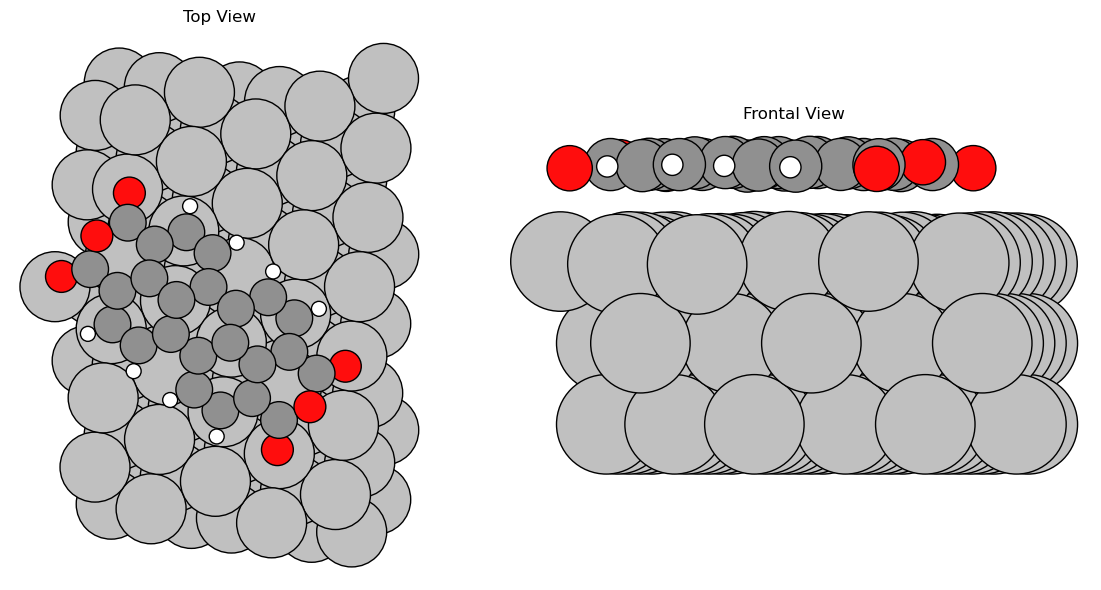

In [3]:
ptcda_ag = read('../../data/PTCDA_simulations/PTCDA_Ag/PTCDA_ag_one_molecule.xyz', format='xyz')

plot_molecule_2d(ptcda_ag, save_path='ptcda_ag_sketch_isolated_on_surface.pdf')

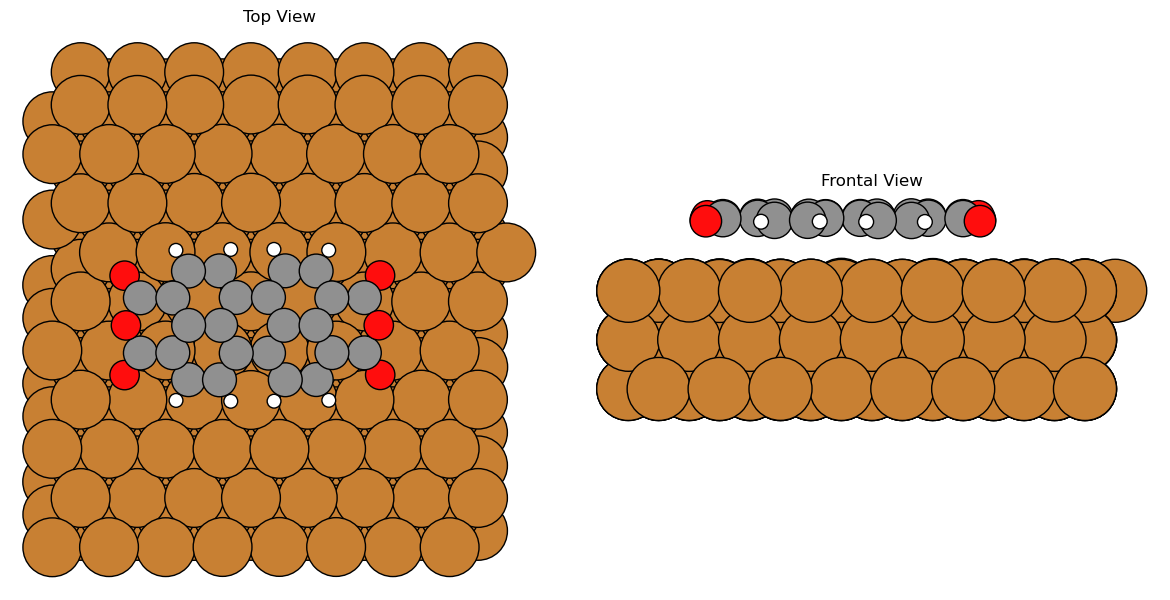

In [4]:
ptcda_cu = read('../../data/PTCDA_simulations/PTCDA_Cu/relaxed/CONTCAR', format='vasp')


ptcda_cu.cell = None
#plot_molecule_2d(ptcda_cu)
plot_molecule_2d(ptcda_cu, save_path='ptcda_cu.pdf')

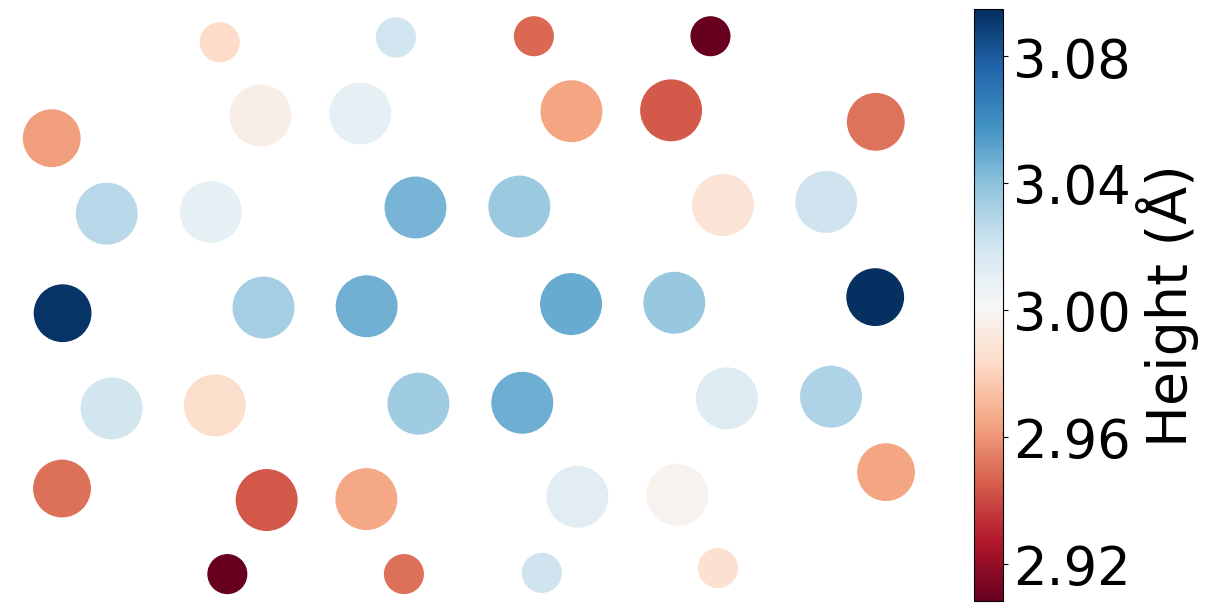

In [5]:
ptcda_ag_isolated = read(f'../../data/PTCDA_simulations/PTCDA_Ag/ptcda_isolated.POSCAR', format='vasp')
ptcda_ag_isolated.positions[:, 2] +=1
plot_height(ptcda_ag_isolated, savepath='ptcda_ag_iso.pdf', tick_list=[3.08 , 3.04, 3.  , 2.96, 2.92 ])   

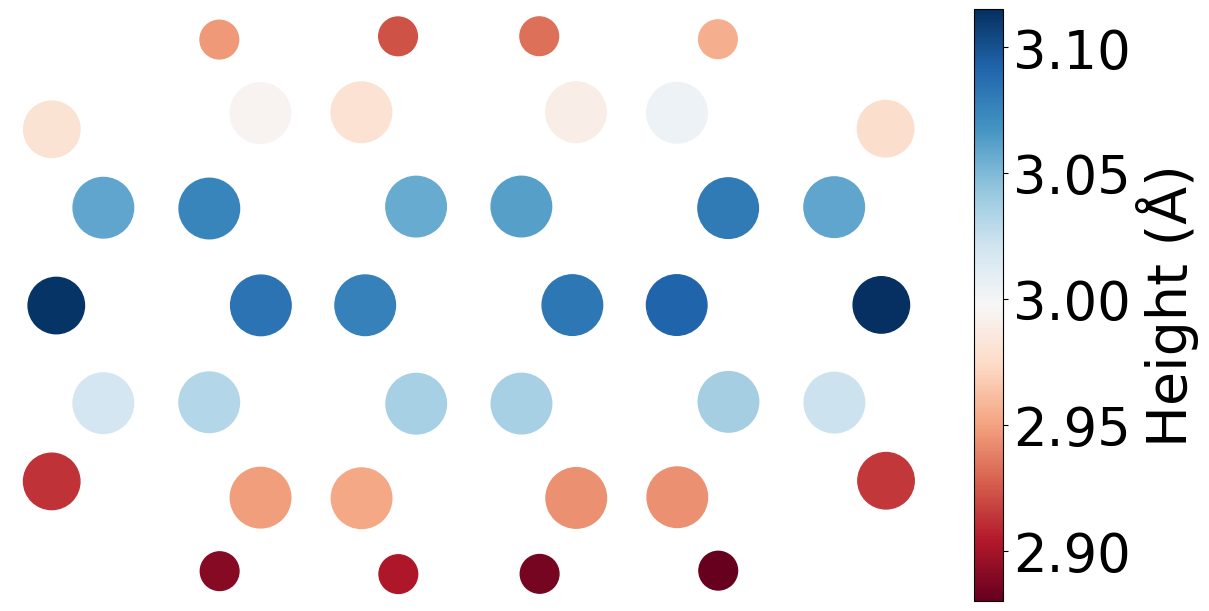

In [6]:
ptcda_cu_isolated = read('../../data/PTCDA_simulations/PTCDA_Cu/POSCAR', format='vasp')

plot_height(ptcda_cu_isolated, savepath='ptcda_cu_iso.pdf', tick_list=[3.1 , 3.05, 3.  , 2.95, 2.9 ])   